In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from lib.core import *
from lib.read_data_basic import *

[17:00:07] lib:INFO: Default saving mode set to do_save False
[17:00:07] lib:INFO: Making sure output folder is defined and exists in the location where the library is imported: ./test
[17:00:07] lib:INFO: Loading chromsizes for danRer11 (reduced)
[17:00:07] lib:INFO: Loading chromosome arm sizes table
[17:00:07] lib:INFO: Loading differential fountain calls (mutant vs WT)
[17:00:07] lib:INFO: Collecting cooler paths for danRer11 datasets
[17:00:07] lib:INFO: Opening base cooler at /home/agalicina/DANIO/HIC/data_danrer11/distiller/results_danrer11/coolers_library_group/WT.danrer11-reduced.mapq_30.1000.mcool::/resolutions/10000
[17:00:07] lib:INFO: Extracting bins table from cooler
[17:00:07] lib:INFO: Loading clean bins with 50 Kb buffer from unmappable regions
[17:00:07] lib:INFO: Loading CTCF motif calls from JASPAR track
[17:00:07] lib:INFO: Loading ATAC-seq peaks (ATAC-Seq_4.5h_DCD019097DT) and annotating CTCF motifs
[17:00:08] lib:INFO: Loading ATAC-seq peaks (ATAC-Seq_12h_DCD0190

In [3]:
pd.DataFrame(check_dep_versions())

,Python,tqdm,numpy,pandas,scipy,statsmodels,matplotlib,seaborn,datashader,ultraplot,scikit-learn,cooler,cooltools,bioframe,fontanka,pybbi
installed,3.12.12,4.67.1,2.3.5,2.3.3,1.16.3,0.14.5,3.10.8,0.13.2,0.18.2,1.66.0,1.7.2,0.10.4,0.7.1,0.8.0,0.2,0.4.2
expected,3.12,None,2.3.5,2.3.3,1.16.3,0.14.5,3.10.8,0.13.2,0.18.2,1.66.0,None,0.10.4,0.7.1,0.8.0,0.2,0.4.2
op,==,None,>=,>=,>=,>=,>=,>=,>=,>=,None,>=,>=,>=,>=,>=
status,installed,installed,ok,ok,ok,ok,ok,ok,ok,ok,installed,ok,ok,ok,ok,ok


In [3]:
from lib.read_data_epigenetics import *
from lib.read_data_hic import *

[17:59:15] lib:INFO: Collecting epigenetic stacks (default flank)
[17:59:15] lib:INFO: Collecting epigenetic background bedgraphs
[17:59:33] lib:INFO: Loaded 246 background bedgraphs
[17:59:58] lib:INFO: Loaded 246 stacks (default flank)
[17:59:58] lib:INFO: Building 10 Kb bin annotation table
[17:59:58] lib:INFO: Merging 246 bedgraph tracks into bin annotations
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 246/246 [00:37<00:00,  6.64it/s]
[18:00:35] lib:INFO: Loading replication initiation zones (Supplemental Dataset 4)
[18:00:35] lib:INFO: Loading origin-to-fountain distance tables
[18:00:35] lib:INFO: Loading ATAC-seq peaks around summits (WT)
[18:00:35] lib:INFO: Loading fountain BEDs for sources: WT, Wild-Type_2.75, TR, Wild-Type_11, Wild-Type_25
[18:00:35] lib:INFO: Loading 200 Kb snippet dct_stacks_hic for sources: WT, PS, SN, NP, TR, MZsox19b_5.3, MZnanog_5.3, MZspg_5

In [4]:
# # Set up saving mode
do_save = True
output_folder = "./results_2025-12-03_AxG_additional"
if not os.path.isdir(output_folder):
    os.mkdir(output_folder)

# Miscellaneous

### + Single-factor mutants (SFig. 4)

#### + Violinplots (SFig. 4D)

In [55]:
section_start()

✅ Section started


In [66]:
df_fountains_single_triple = pd.read_excel(
    "/home/agalicina/DANIO/HIC/WD_2021_paper/13_epigenetics/data/tables/Supplemental Dataset 5.xlsx"
)

In [67]:
df_fountains_single_triple.head()

,fountain_Nr,group_name,group_number,WT2_4.3hpf,WT3_4.3hpf,WT4_4.3hpf,WT1_4.3hpf,WT_mean,MZtriple1_4.3hpf,MZtriple2_4.3hpf,...,MZnanog1_4.3hpf,MZnanog2_4.3hpf,Nanog_mean,MZspg1_4.3hMZspgf,MZspg2_4.3hMZspgf,MZspg3_4.3hMZspgf,Spg_mean,Triple_log2FC,Nanog_log2_FC,Spg_log2_FC
0,35945,N,II,1056.430296,919.945554,1088.531639,895.989670,990.224289,277.800225,273.658237,...,283.975645,211.998984,247.987315,940.111009,757.514095,722.947361,806.857489,-1.935450,-1.997489,-0.295441
1,126799,All,IV,1320.108427,1310.025137,1046.400477,1071.516455,1187.012624,254.650206,319.267943,...,439.538531,400.521571,420.030051,559.850161,549.498320,461.883036,523.743839,-2.012454,-1.498771,-1.180402
2,2989,N,II,1527.100054,1410.142415,1588.946657,1413.392155,1484.895320,472.431864,478.901914,...,749.930515,663.030381,706.480448,1391.426760,1395.990261,1320.048330,1369.155117,-1.542181,-1.071640,-0.117075
3,36045,All,IV,681.955817,693.264925,607.032652,557.555671,634.952266,105.461196,68.414559,...,347.081344,312.307229,329.694286,483.329497,412.424341,421.719294,439.157711,-2.607480,-0.945519,-0.531909
4,12891,P,I,210.427173,226.680629,189.160316,126.195728,188.115962,222.926106,296.463090,...,218.668584,175.005873,196.837229,134.301573,114.228316,137.226120,128.585336,0.429305,0.065381,-0.548896


In [68]:
columns_order = ["WT_mean", "Spg_mean", "Nanog_mean", "Triple_mean"]
colors_order = ["white", "#e67fe6", "#add8e6", "#ffa54f"]
rows_order = ["I", "II", "III", "IV", "V"]

In [69]:
df_toplot = df_fountains_single_triple.melt(
    id_vars=["fountain_Nr", "group_number"],
    value_vars=columns_order,
    var_name="ATAC_source",
    value_name="ATAC",
)
df_toplot.loc[:, "log10_ATAC"] = np.log10(df_toplot["ATAC"])

In [70]:
df_toplot.head()

,fountain_Nr,group_number,ATAC_source,ATAC,log10_ATAC
0,35945,II,WT_mean,990.224289,2.995734
1,126799,IV,WT_mean,1187.012624,3.074455
2,2989,II,WT_mean,1484.895320,3.171696
3,36045,IV,WT_mean,634.952266,2.802741
4,12891,I,WT_mean,188.115962,2.274426


In [71]:
def wilcoxon_directional(v1, v2, alt="dynamic"):
    mask = np.isfinite(v1) & np.isfinite(v2)
    if alt == "dynamic":
        if v1[mask].median() >= v2[mask].median():
            alt = "greater"
        else:
            alt = "less"
    else:
        assert alt in [
            "greater",
            "less",
        ], "Please, provide valid alternative, less or greater"
    stat = scipy.stats.wilcoxon(v1[mask], v2[mask], alternative=alt)
    return stat[0], stat[1], alt

*** 2.711728799281765e-29 Spg_mean I
ns 0.46434709362949955 Nanog_mean I
*** 4.468646451396151e-20 Triple_mean I
ns 0.9645239568042321 Spg_mean II
*** 4.37423947172168e-20 Nanog_mean II
*** 1.369759659594061e-18 Triple_mean II
ns 0.24330045699303293 Spg_mean III
*** 2.3778784558654817e-05 Nanog_mean III
*** 8.553276089142603e-16 Triple_mean III
*** 2.6813131325564844e-15 Spg_mean IV
*** 2.6813131325564844e-15 Nanog_mean IV
*** 2.6813131325564844e-15 Triple_mean IV
ns 1.0 Spg_mean V
ns 1.0 Nanog_mean V
ns 1.0 Triple_mean V


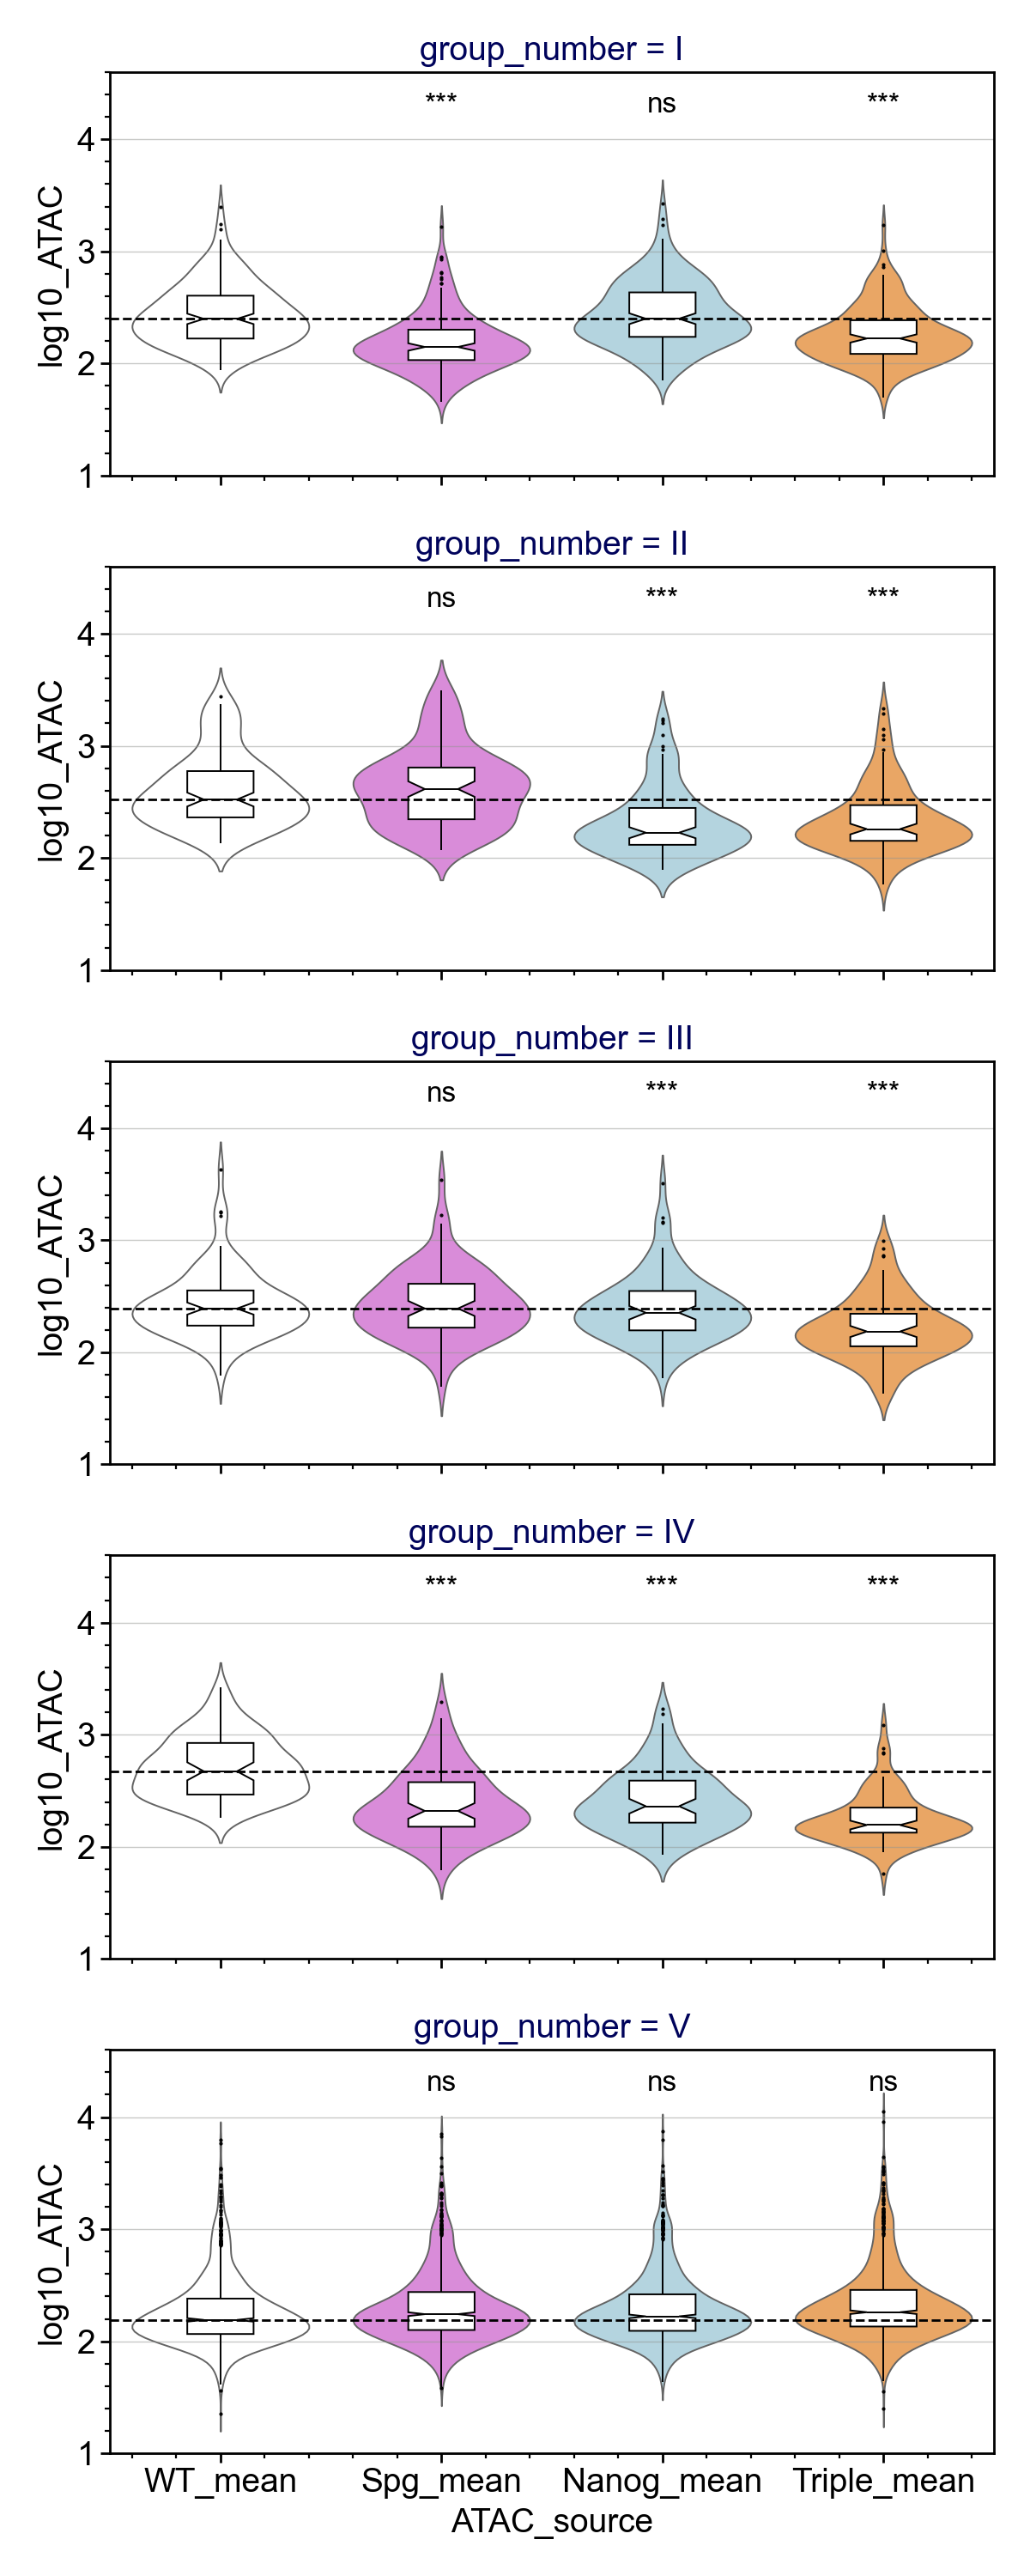

In [74]:
g = sns.FacetGrid(
    df_toplot, row="group_number", height=3, aspect=2, row_order=rows_order
)

g.map(
    sns.violinplot,
    "ATAC_source",
    "log10_ATAC",
    order=columns_order,
    palette=colors_order,
    inner=None,
    linewidth=0.7,
)

g.map(
    sns.boxplot,
    "ATAC_source",
    "log10_ATAC",
    order=columns_order,
    notch=True,
    width=0.3,
    color="white",
    linewidth=0.7,
    linecolor="k",
    fliersize=1,
    showcaps=False,
    flierprops=dict(marker=".", markerfacecolor="k"),
)


# --- add median line for the first column in each facet ---
def add_median_first_column(data, color=None, **kws):
    ax = plt.gca()
    first_level = columns_order[0]  # "first column" on x-axis
    median_val = np.nanmedian(
        data.loc[data["ATAC_source"] == first_level, "log10_ATAC"]
    )
    ax.axhline(median_val, color="k", linestyle="--", linewidth=1)


g.map_dataframe(add_median_first_column)

# give some headroom for significance stars
y_min = 1  # df_toplot["log10_ATAC"].min()
y_max = 4  # df_toplot["log10_ATAC"].max()
pad = 0.2 * (y_max - y_min)
g.set(ylim=(y_min, y_max + pad))


# significance stars vs wild-type (first column)
def add_sig_stars_vs_wt(data, **kws):
    ax = plt.gca()
    wt = columns_order[0]
    ref = data.loc[data["ATAC_source"] == wt, "log10_ATAC"]

    # vertical position for stars
    ylim = ax.get_ylim()
    y_star = ylim[1] - 0.05 * (ylim[1] - ylim[0])

    for i, cat in enumerate(columns_order[1:]):
        x_pos = i + 1
        if cat == wt:
            continue  # don't compare WT to itself

        vals = data.loc[data["ATAC_source"] == cat, "log10_ATAC"]
        if len(ref) == 0 or len(vals) == 0:
            continue

        # Wilcoxon paired test, one-sided:
        stat, p, alt = wilcoxon_directional(ref.values, vals.values, alt="greater")

        if p < 0.001:
            star = "***"
        elif p < 0.01:
            star = "**"
        elif p < 0.05:
            star = "*"
        else:
            star = "ns"  # or "" if you only want asterisks

        print(star, p, cat, data["group_number"].values[0])

        ax.text(
            x_pos,
            y_star,
            star,
            ha="center",
            va="top",
            fontsize=12,
            clip_on=False,
        )


g.map_dataframe(add_sig_stars_vs_wt)

for ax in g.axes.flat:
    ax.spines["right"].set_visible(True)
    ax.spines["top"].set_visible(True)
    ax.grid(True, axis="y", color="gray", linewidth=0.5, alpha=0.5)

if do_save:
    prefix = f"{output_folder}/SFig4D.violin-plots"
    g.figure.savefig(f"{prefix}.pdf")
    g.figure.savefig(f"{prefix}.png")

In [63]:
gb = df_toplot.groupby(["group_number", "ATAC_source"])

output_table = {}
for group in rows_order:
    vs = []
    for source_atac in columns_order:
        vs.append(gb.get_group((group, source_atac))["log10_ATAC"].values)

    output_table[(group, 0, columns_order[0])] = (
        np.nan,
        np.nan,
        "-",
        *pd.Series(vs[0]).describe(),
    )
    for i in range(1, 4):
        stat, pv, alt = wilcoxon_directional(vs[0], vs[i], alt="greater")
        output_table[(group, i, columns_order[i])] = (
            stat,
            pv,
            alt,
            *pd.Series(vs[i]).describe(),
        )

In [64]:
output_table = pd.DataFrame(output_table).T.reset_index()
output_table.columns = [
    "group",
    "index",
    "atac_source",
    "stat",
    "pval",
    "alternative",
    "count",
    "mean",
    "std",
    "min",
    "25%",
    "50%",
    "75%",
    "max",
]
output_table = output_table.sort_values(["group", "index", "atac_source"]).set_index(
    ["group", "atac_source"]
)

In [65]:
if do_save:
    prefix = f"{output_folder}/SFig4D.violin-plots"
    output_table.to_csv(f"{prefix}.source.tsv", sep="\t")

#### + Pileups (SFig. 4E)

In [16]:
df_fountains_single_triple.head()

,fountain_Nr,group_name,group_number,WT2_4.3hpf,WT3_4.3hpf,WT4_4.3hpf,WT1_4.3hpf,WT_mean,MZtriple1_4.3hpf,MZtriple2_4.3hpf,...,MZnanog1_4.3hpf,MZnanog2_4.3hpf,Nanog_mean,MZspg1_4.3hMZspgf,MZspg2_4.3hMZspgf,MZspg3_4.3hMZspgf,Spg_mean,Triple_log2FC,Nanog_log2_FC,Spg_log2_FC
0,35945,N,II,1056.430296,919.945554,1088.531639,895.989670,990.224289,277.800225,273.658237,...,283.975645,211.998984,247.987315,940.111009,757.514095,722.947361,806.857489,-1.935450,-1.997489,-0.295441
1,126799,All,IV,1320.108427,1310.025137,1046.400477,1071.516455,1187.012624,254.650206,319.267943,...,439.538531,400.521571,420.030051,559.850161,549.498320,461.883036,523.743839,-2.012454,-1.498771,-1.180402
2,2989,N,II,1527.100054,1410.142415,1588.946657,1413.392155,1484.895320,472.431864,478.901914,...,749.930515,663.030381,706.480448,1391.426760,1395.990261,1320.048330,1369.155117,-1.542181,-1.071640,-0.117075
3,36045,All,IV,681.955817,693.264925,607.032652,557.555671,634.952266,105.461196,68.414559,...,347.081344,312.307229,329.694286,483.329497,412.424341,421.719294,439.157711,-2.607480,-0.945519,-0.531909
4,12891,P,I,210.427173,226.680629,189.160316,126.195728,188.115962,222.926106,296.463090,...,218.668584,175.005873,196.837229,134.301573,114.228316,137.226120,128.585336,0.429305,0.065381,-0.548896


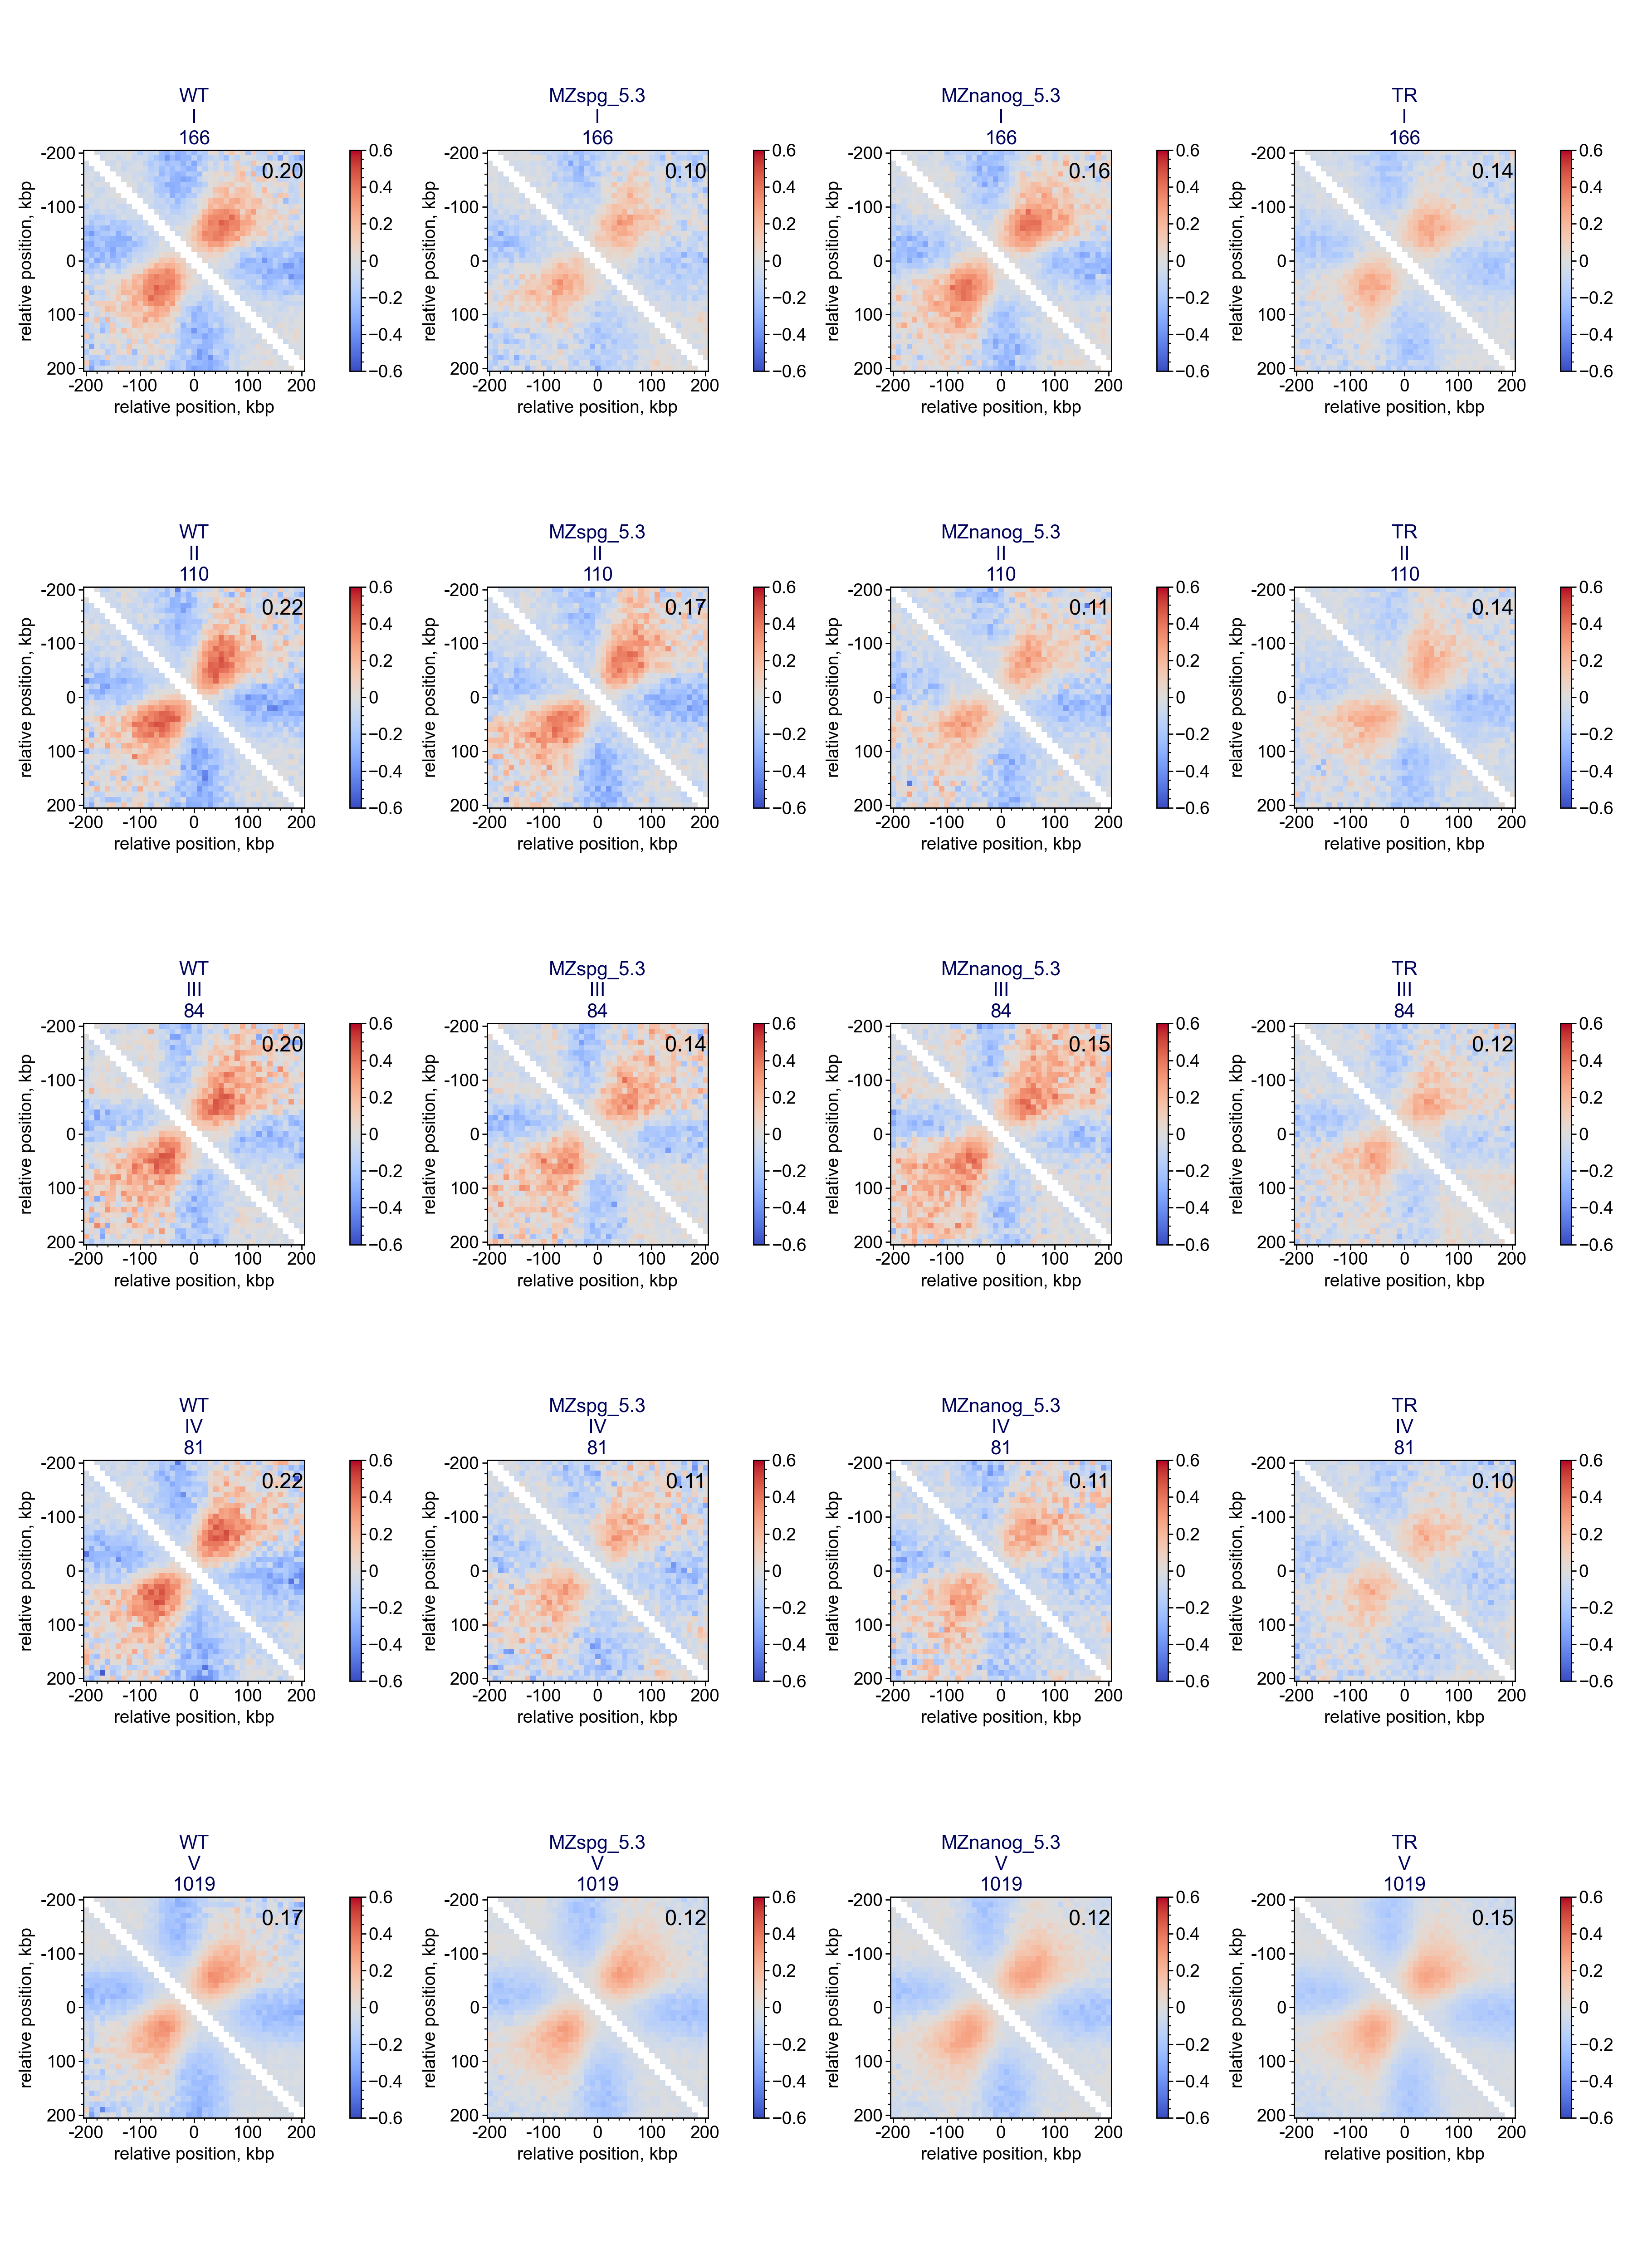

In [17]:
# Save the Hi-C pileups
titles = ["I", "II", "III", "IV", "V"]
idxs = [
    df_fountains_single_triple.query(f'group_number=="{i}"')["fountain_Nr"].values
    for i in titles
]

f, axes_all = plt.subplots(5, 4, figsize=[18, 25])

for i_source, source_fountains in enumerate(["WT", "MZspg_5.3", "MZnanog_5.3", "TR"]):

    axes = np.array([axes_all[i_type, i_source] for i_type, i in enumerate(titles)])

    stacks_list = dct_stacks_hic[source_fountains]

    plot_pileups(
        stacks_list,
        idxs,
        titles,
        flank=200_000,
        resolution=10_000,
        vmin=-0.6,
        vmax=0.6,
        reduce_ticks=False,
        cmap="coolwarm",
        avscore=df_fountain_strength[source_fountains],
        add_counts=True,
        f=f,
        axes=axes,
    )

    for i, ax in enumerate(axes):
        title = ax.get_title()
        title = f"{source_fountains}\n{title}"
        ax.set_title(title)

    if do_save:
        prefix = f"{output_folder}/SFig4E.pileups"
        f.savefig(f"{prefix}.pdf")
        f.savefig(f"{prefix}.png")

In [18]:
# Save the Hi-C pileups
titles = ["I", "II", "III", "IV", "V"]
idxs = [
    df_fountains_single_triple.query(f'group_number=="{i}"')["fountain_Nr"].values
    for i in titles
]

datasets_pileupds = {}

for source_fountains in ["WT", "MZspg_5.3", "MZnanog_5.3", "TR"]:

    stacks_list = dct_stacks_hic[source_fountains]

    data_pileups = plot_pileups(
        stacks_list,
        idxs,
        titles,
        avscore=df_fountain_strength[source_fountains],
        return_source_data=True,
    )

    datasets_pileupds[source_fountains] = data_pileups

In [19]:
if do_save:
    output = []
    for source_fountains in ["WT", "MZspg_5.3", "MZnanog_5.3", "TR"]:
        data_pileups = datasets_pileupds[source_fountains]

        for data in data_pileups:

            df_tmp = pd.DataFrame(data[2])
            df_tmp.insert(loc=0, column="fountain score", value=data[1])
            df_tmp.insert(loc=0, column="label", value=data[0])
            df_tmp.insert(loc=0, column="source_fountains", value=source_fountains)
            output.append(df_tmp.copy())

    output = pd.concat(output, axis=0)
    prefix = f"{output_folder}/SFig4E.pileups."
    output.to_csv(f"{prefix}.source.tsv", sep="\t")

#### + ChIP-Seq violinplots for different types of fountains (SFig. 4f,g)

In [77]:
df_merged = pd.merge(
    df_fountains_single_triple,
    df_annotations,
    left_on="fountain_Nr",
    right_index=True,
    how="left",
)

In [78]:
groups_order = ["I", "II", "III", "IV", "V"]

In [79]:
def mannwhitney_directional(v1, v2, alt="dynamic"):
    mask1 = np.isfinite(v1)
    mask2 = np.isfinite(v2)
    if alt == "dynamic":
        if v1[mask1].median() >= v2[mask2].median():
            alt = "greater"
        else:
            alt = "less"
    else:
        assert alt in [
            "greater",
            "less",
        ], "Please, provide valid alternative, less or greater"
    stat = scipy.stats.mannwhitneyu(v1[mask1], v2[mask2], alternative=alt)
    return stat[0], stat[1], alt

I 64203.0 less 3.107252498376826e-07 ***
II 52452.0 less 0.13433478359401113 ns
III 38765.0 less 0.07529099582039968 ns
IV 22891.0 less 1.1881656998776742e-11 ***


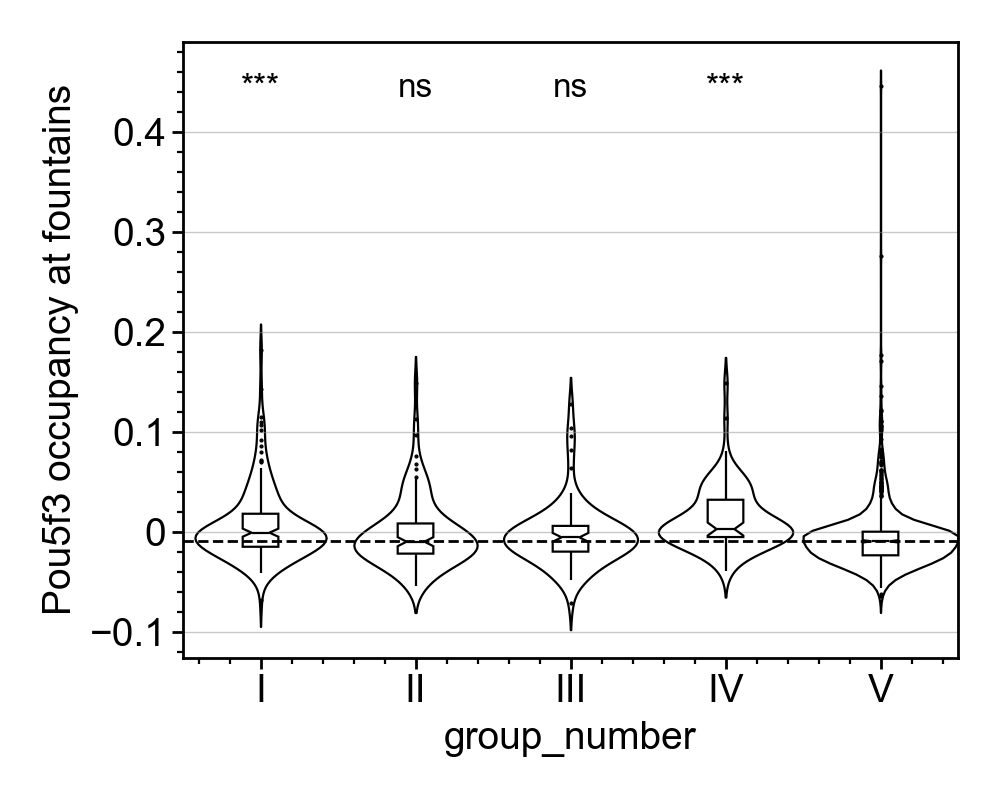

In [81]:
f, ax = plt.subplots(1, 1, figsize=[5, 4])

y_col = "log2ratio_Pou5f3_4_Pou5f3-Myc-tag_inj_Miao2022_B1_EXP-Pou5f3-ChIP-seq-4h_SRX13823181_R1"

sns.violinplot(
    data=df_merged,
    x="group_number",
    y=y_col,
    order=groups_order,
    width=1.0,
    linecolor="k",
    inner=None,
    linewidth=0.8,
    color="white",
    ax=ax,
)

sns.boxplot(
    data=df_merged,
    x="group_number",
    y=y_col,
    order=groups_order,
    notch=True,
    width=0.23,
    color="white",
    linewidth=0.8,
    linecolor="k",
    fliersize=1,
    showcaps=False,
    flierprops=dict(marker=".", markerfacecolor="k"),
    ax=ax,
)

median_val = np.nanmedian(df_merged.query('group_number=="V"')[y_col].values)
ax.axhline(median_val, color="k", linestyle="--", linewidth=1)

# Add significance values:
ylim = ax.get_ylim()
y_star = ylim[1] - 0.05 * (ylim[1] - ylim[0])

ref = df_merged.query('group_number=="V"')[y_col]

for i, cat in enumerate(groups_order[:-1]):
    x_pos = i
    if cat == "V":
        continue  # don't compare WT to itself

    vals = df_merged.query(f'group_number=="{cat}"')[y_col]
    if len(ref) == 0 or len(vals) == 0:
        continue

    # two-sided Mann–Whitney U test (use what you prefer)
    stat, p, alt = mannwhitney_directional(ref.values, vals.values, alt="less")

    if p < 0.001:
        star = "***"
    elif p < 0.01:
        star = "**"
    elif p < 0.05:
        star = "*"
    else:
        star = "ns"  # or "" if you only want asterisks

    print(cat, stat, alt, p, star)
    ax.text(
        x_pos,
        y_star,
        star,
        ha="center",
        va="top",
        fontsize=12,
        clip_on=False,
    )

ax.grid(True, axis="y", color="gray", linewidth=0.5, alpha=0.5)

ax.set_ylabel("Pou5f3 occupancy at fountains")
f.tight_layout()

if do_save:
    prefix = f"{output_folder}/SFig4F.violin-plots"
    f.savefig(f"{prefix}.png")
    f.savefig(f"{prefix}.pdf")

I 68779.0 less 5.553261697162637e-05 ***
II 25012.0 less 6.160562522417782e-22 ***
III 27102.0 less 1.1013748323495648e-08 ***
IV 13358.0 less 1.710975890825366e-24 ***


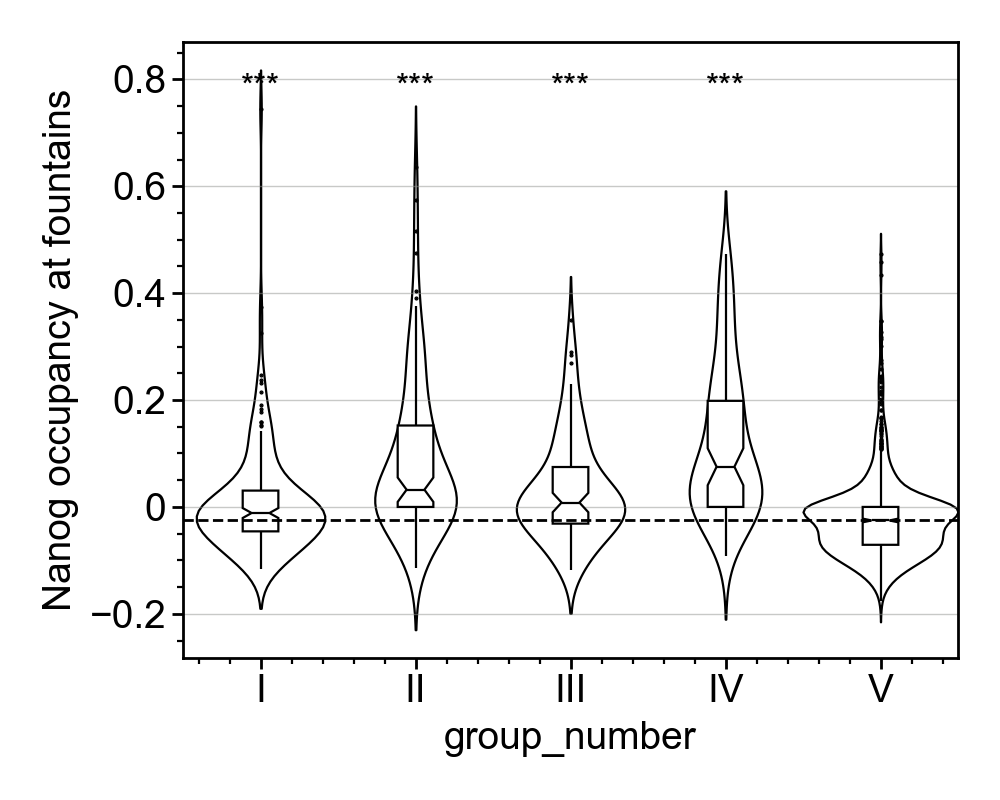

In [82]:
f, ax = plt.subplots(1, 1, figsize=[5, 4])

y_col = "log2ratio_Nanog-like_4.5hpf_Xu2012_R1"

sns.violinplot(
    data=df_merged,
    x="group_number",
    y=y_col,
    order=groups_order,
    width=1.0,
    linecolor="k",
    inner=None,
    linewidth=0.8,
    color="white",
    ax=ax,
)

sns.boxplot(
    data=df_merged,
    x="group_number",
    y=y_col,
    order=groups_order,
    notch=True,
    width=0.23,
    color="white",
    linewidth=0.8,
    linecolor="k",
    fliersize=1,
    showcaps=False,
    flierprops=dict(marker=".", markerfacecolor="k"),
    ax=ax,
)

median_val = np.nanmedian(df_merged.query('group_number=="V"')[y_col].values)
ax.axhline(median_val, color="k", linestyle="--", linewidth=1)

# Add significance values:
ylim = ax.get_ylim()
y_star = ylim[1] - 0.05 * (ylim[1] - ylim[0])

ref = df_merged.query('group_number=="V"')[y_col]

for i, cat in enumerate(groups_order[:-1]):
    x_pos = i
    if cat == "V":
        continue  # don't compare WT to itself

    vals = df_merged.query(f'group_number=="{cat}"')[y_col]
    if len(ref) == 0 or len(vals) == 0:
        continue

    # two-sided Mann–Whitney U test (use what you prefer)
    stat, p, alt = mannwhitney_directional(ref.values, vals.values, alt="less")

    if p < 0.001:
        star = "***"
    elif p < 0.01:
        star = "**"
    elif p < 0.05:
        star = "*"
    else:
        star = "ns"  # or "" if you only want asterisks

    print(cat, stat, alt, p, star)
    ax.text(
        x_pos,
        y_star,
        star,
        ha="center",
        va="top",
        fontsize=12,
        clip_on=False,
    )

ax.grid(True, axis="y", color="gray", linewidth=0.5, alpha=0.5)

ax.set_ylabel("Nanog occupancy at fountains")
f.tight_layout()

if do_save:
    prefix = f"{output_folder}/SFig4G.violin-plots"
    f.savefig(f"{prefix}.png")
    f.savefig(f"{prefix}.pdf")

In [25]:
gb = df_merged.groupby(["group_number"])

cols = [
    "log2ratio_Pou5f3_4_Pou5f3-Myc-tag_inj_Miao2022_B1_EXP-Pou5f3-ChIP-seq-4h_SRX13823181_R1",
    "log2ratio_Nanog-like_4.5hpf_Xu2012_R1",
]

output_table = {}
for col in cols:
    vs = []
    for group in groups_order:
        vs.append(gb.get_group(group)[col].values)

    output_table[(groups_order[-1], col)] = (
        *pd.Series(vs[-1]).describe(),
        np.nan,
        np.nan,
        "-",
    )

    for i in range(0, 4):
        stat, pv, alt = mannwhitney_directional(vs[-1], vs[i], alt="less")
        output_table[(groups_order[i], col)] = (
            *pd.Series(vs[i]).describe(),
            stat,
            pv,
            alt,
        )

In [26]:
output_table = pd.DataFrame(output_table).T.reset_index()
output_table.columns = [
    "group_number",
    "col",
    "count",
    "mean",
    "std",
    "min",
    "25%",
    "50%",
    "75%",
    "max",
    "stat",
    "pval",
    "alternative",
]
output_table = output_table.sort_values(["col", "group_number"]).set_index(
    ["col", "group_number"]
)

In [27]:
if do_save:
    prefix = f"{output_folder}/SFig4F-G.violin-plots"
    output_table.to_csv(f"{prefix}.source.tsv", sep="\t")

#### + Plot individual fountain (SFig. 4C, Fig. 1C)

In [28]:
df_fountains.head()

,chrom,start,end,SIM
3,,,,
35945,chr6,26980000,26990000,0.546212
126799,chr24,2420000,2430000,0.518767
2989,chr1,29890000,29900000,0.518554
36045,chr6,27980000,27990000,0.489346
12891,chr3,9680000,9690000,0.488161


##### Fig. 4C fountain with a big change in mutants:

In [29]:
mask = df_fountains["chrom"] == "chr4"
mask &= df_fountains["start"] > 6_250_000
mask &= df_fountains["end"] < 6_650_000

df_fountains.loc[mask, :]

,chrom,start,end,SIM
3,,,,
18832,chr4,6460000,6470000,0.231767


In [30]:
idx = df_fountains.loc[mask, :].index[0]
chrom = df_fountains.loc[mask, "chrom"].values[0]
start = df_fountains.loc[mask, "start"].values[0]
end = df_fountains.loc[mask, "end"].values[0]

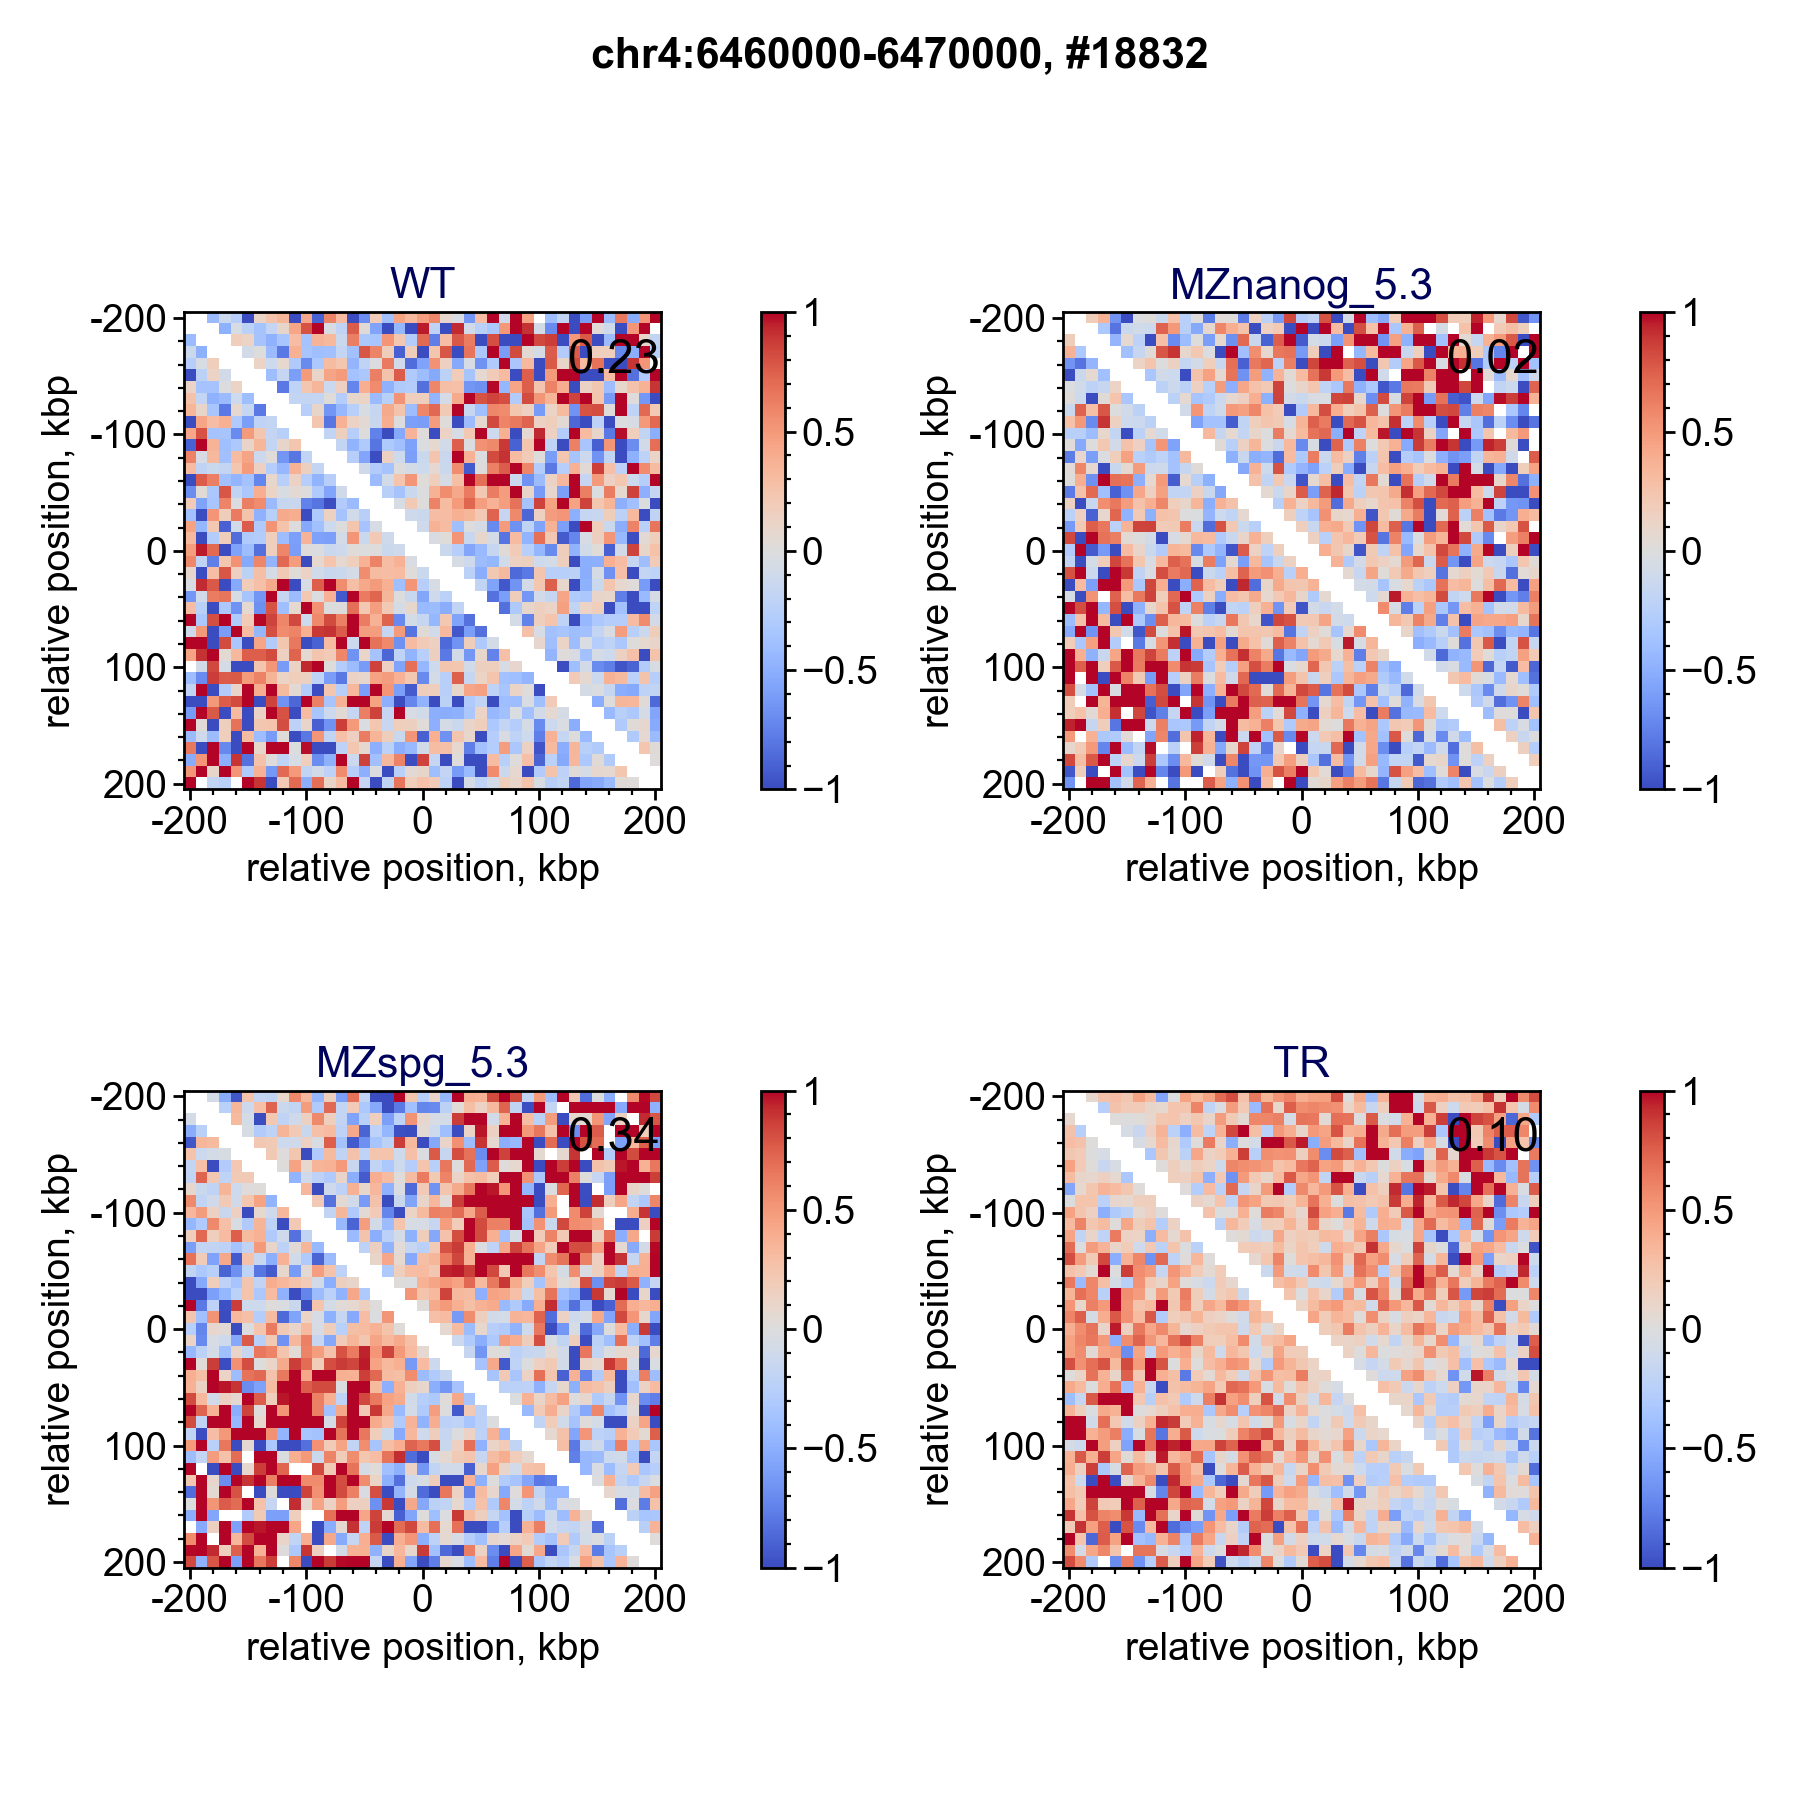

In [31]:
# Save the Hi-C individual example
# Interface is the same as for pileups, but I plot only a single snippet in it:

titles = [f"{chrom}:{start}-{end}, #{idx}"]
idxs = [np.array([idx])]

f, axes_all = plt.subplots(2, 2, figsize=[9, 9])
axes_all = axes_all.flatten()

for i_source, source_fountains in enumerate(["WT", "MZnanog_5.3", "MZspg_5.3", "TR"]):

    axes = np.array([axes_all[i_source]])

    stacks_list = dct_stacks_hic[source_fountains]

    plot_pileups(
        stacks_list,
        idxs,
        titles,
        flank=200_000,
        resolution=10_000,
        vmin=-1,
        vmax=1,
        reduce_ticks=False,
        cmap="coolwarm",
        avscore=df_fountain_strength[source_fountains],
        add_counts=True,
        f=f,
        axes=axes,
    )

    for i, ax in enumerate(axes):
        title = ax.get_title()
        title = f"{source_fountains}"
        ax.set_title(title)

    f.suptitle(titles[0])

    if do_save:
        prefix = f"{output_folder}/SFig4C.example"
        f.savefig(f"{prefix}.pdf")
        f.savefig(f"{prefix}.png")

In [32]:
for i_source, source_fountains in enumerate(["WT", "MZnanog_5.3", "MZspg_5.3", "TR"]):

    axes = np.array([axes_all[i_source]])
    stacks_list = dct_stacks_hic[source_fountains]
    snippet = stacks_list[idx, :, :]

    df_tmp = pd.DataFrame(snippet)
    df_tmp.insert(
        loc=0, column="position_fountain", value=f"{chrom}:{start}-{end}, #{idx}"
    )
    df_tmp.insert(loc=0, column="source_fountains", value=source_fountains)

    if do_save:
        prefix = f"{output_folder}/SFig4C.example.{source_fountains}"
        df_tmp.to_csv(f"{prefix}.source.tsv", sep="\t")

##### Fountain 10 from Fig. 1c, time series
fountain 10 is 9 if 0-indexed.

In [33]:
mask = df_fountains.reset_index().index == 9

df_fountains.loc[mask, :]

,chrom,start,end,SIM
3,,,,
56778,chr9,46430000,46440000,0.449299


In [34]:
idx = df_fountains.loc[mask, :].index[0]
chrom = df_fountains.loc[mask, "chrom"].values[0]
start = df_fountains.loc[mask, "start"].values[0]
end = df_fountains.loc[mask, "end"].values[0]

In [35]:
dct_stacks_hic.keys()

dict_keys(['WT', 'PS', 'SN', 'NP', 'TR', 'MZsox19b_5.3', 'MZnanog_5.3', 'MZspg_5.3', 'Wild-Type_2.75', 'Wild-Type_5.3', 'Wild-Type_11', 'Wild-Type_25', 'Wike2021_WT_ZF_Embryos_4hpf_FLAV', 'Wike2021_WT_ZF_Embryos_4hpf_SGC', 'Wike2021_WT_ZF_Embryos_4hpf_DMSO', 'sperm'])

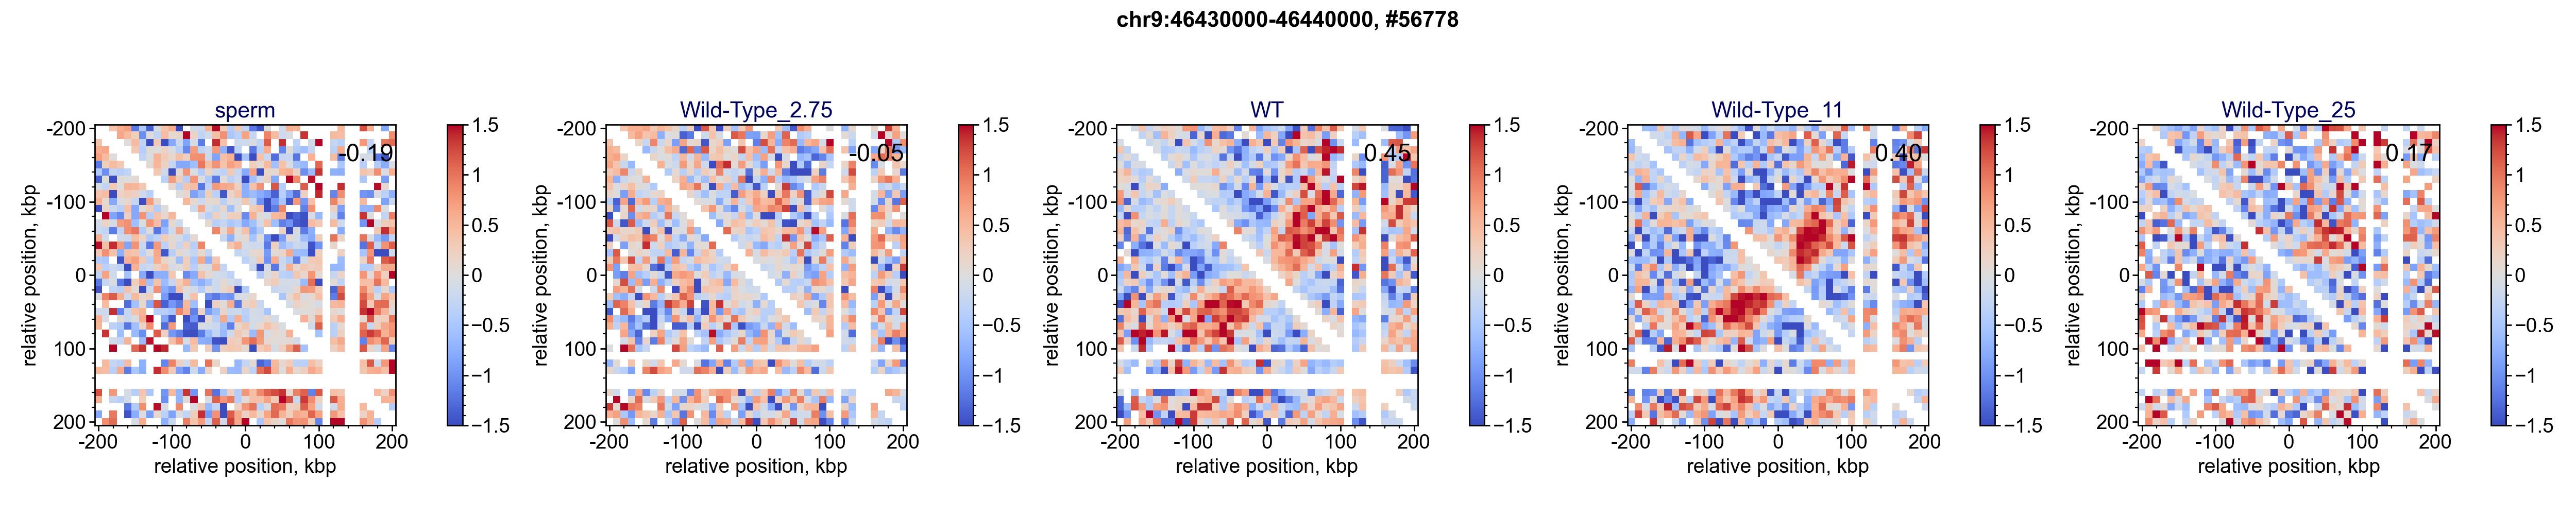

In [36]:
# Save the Hi-C individual example
# Interface is the same as for pileups, but I plot only a single snippet in it:

titles = [f"{chrom}:{start}-{end}, #{idx}"]
idxs = [np.array([idx])]

f, axes_all = plt.subplots(1, 5, figsize=[25, 5])
axes_all = axes_all.flatten()

for i_source, source_fountains in enumerate(
    ["sperm", "Wild-Type_2.75", "WT", "Wild-Type_11", "Wild-Type_25"]
):

    axes = np.array([axes_all[i_source]])

    stacks_list = dct_stacks_hic[source_fountains]

    plot_pileups(
        stacks_list,
        idxs,
        titles,
        flank=200_000,
        resolution=10_000,
        vmin=-1.5,
        vmax=1.5,
        reduce_ticks=False,
        cmap="coolwarm",
        avscore=df_fountain_strength[source_fountains],
        add_counts=True,
        f=f,
        axes=axes,
    )

    for i, ax in enumerate(axes):
        title = ax.get_title()
        title = f"{source_fountains}"
        ax.set_title(title)

    f.suptitle(titles[0])

    if do_save:
        prefix = f"{output_folder}/Fig1C.example.{idx}"
        f.savefig(f"{prefix}.pdf")
        f.savefig(f"{prefix}.png")

In [37]:
for i_source, source_fountains in enumerate(
    ["sperm", "Wild-Type_2.75", "WT", "Wild-Type_11", "Wild-Type_25"]
):

    axes = np.array([axes_all[i_source]])
    stacks_list = dct_stacks_hic[source_fountains]
    snippet = stacks_list[idx, :, :]

    df_tmp = pd.DataFrame(snippet)
    df_tmp.insert(
        loc=0, column="position_fountain", value=f"{chrom}:{start}-{end}, #{idx}"
    )
    df_tmp.insert(loc=0, column="source_fountains", value=source_fountains)

    if do_save:
        prefix = f"{output_folder}/Fig1C.example.{idx}.{source_fountains}"
        df_tmp.to_csv(f"{prefix}.source.tsv", sep="\t")

##### Fountain 4 from Fig. 1c, time series
fountain 4 is 3 if 0-indexed.

In [38]:
mask = df_fountains.reset_index().index == 3

df_fountains.loc[mask, :]

,chrom,start,end,SIM
3,,,,
36045,chr6,27980000,27990000,0.489346


In [39]:
idx = df_fountains.loc[mask, :].index[0]
chrom = df_fountains.loc[mask, "chrom"].values[0]
start = df_fountains.loc[mask, "start"].values[0]
end = df_fountains.loc[mask, "end"].values[0]

In [40]:
dct_stacks_hic.keys()

dict_keys(['WT', 'PS', 'SN', 'NP', 'TR', 'MZsox19b_5.3', 'MZnanog_5.3', 'MZspg_5.3', 'Wild-Type_2.75', 'Wild-Type_5.3', 'Wild-Type_11', 'Wild-Type_25', 'Wike2021_WT_ZF_Embryos_4hpf_FLAV', 'Wike2021_WT_ZF_Embryos_4hpf_SGC', 'Wike2021_WT_ZF_Embryos_4hpf_DMSO', 'sperm'])

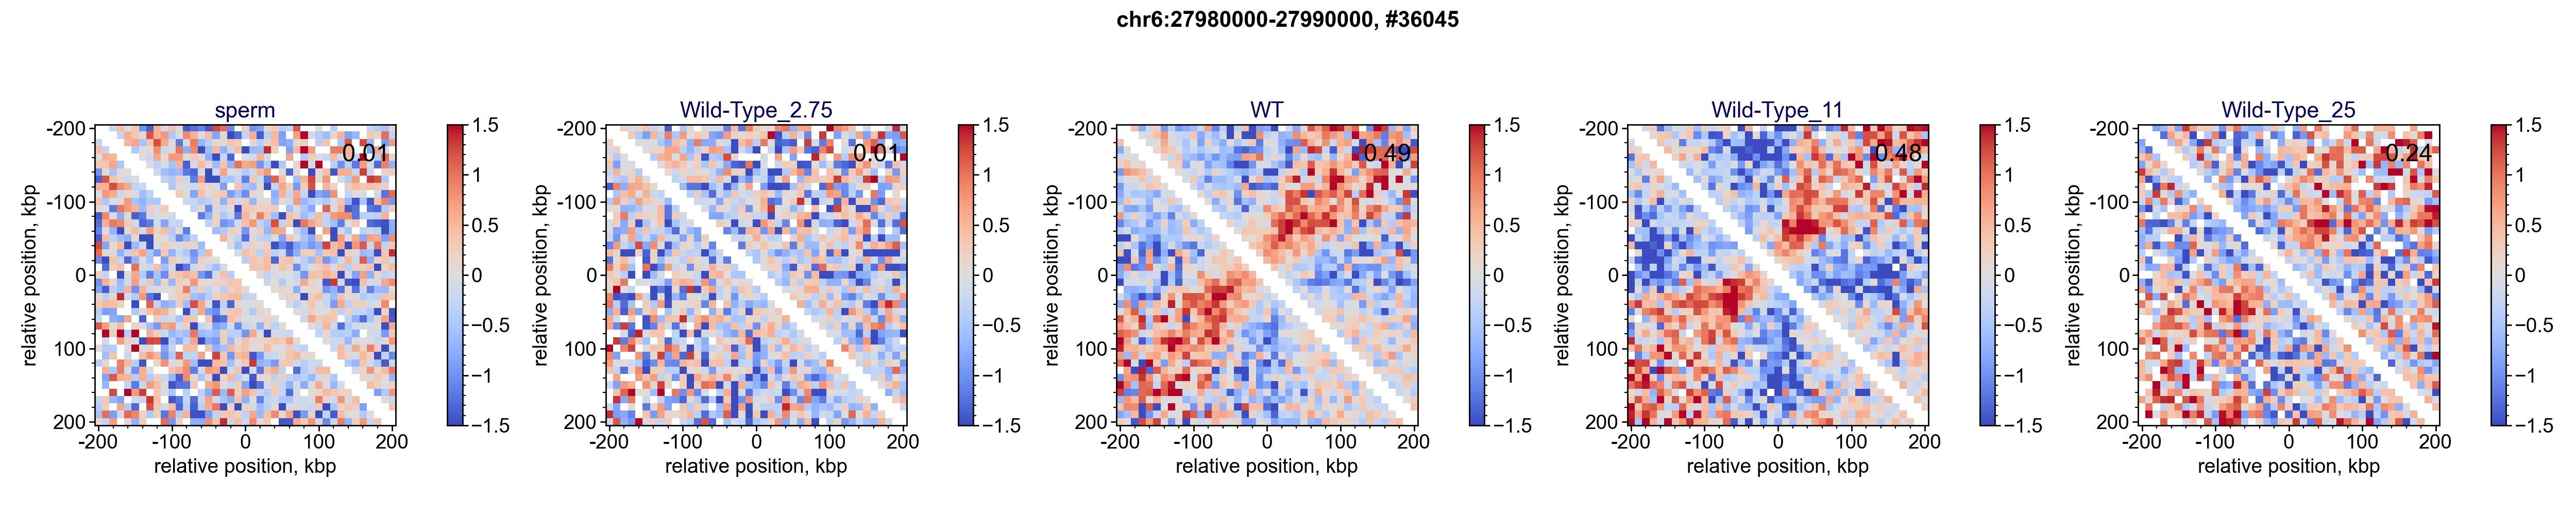

In [41]:
# Save the Hi-C individual example
# Interface is the same as for pileups, but I plot only a single snippet in it:

titles = [f"{chrom}:{start}-{end}, #{idx}"]
idxs = [np.array([idx])]

f, axes_all = plt.subplots(1, 5, figsize=[25, 5])
axes_all = axes_all.flatten()

for i_source, source_fountains in enumerate(
    ["sperm", "Wild-Type_2.75", "WT", "Wild-Type_11", "Wild-Type_25"]
):

    axes = np.array([axes_all[i_source]])

    stacks_list = dct_stacks_hic[source_fountains]

    plot_pileups(
        stacks_list,
        idxs,
        titles,
        flank=200_000,
        resolution=10_000,
        vmin=-1.5,
        vmax=1.5,
        reduce_ticks=False,
        cmap="coolwarm",
        avscore=df_fountain_strength[source_fountains],
        add_counts=True,
        f=f,
        axes=axes,
    )

    for i, ax in enumerate(axes):
        title = ax.get_title()
        title = f"{source_fountains}"
        ax.set_title(title)

    f.suptitle(titles[0])

    if do_save:
        prefix = f"{output_folder}/Fig1C.example.{idx}"
        f.savefig(f"{prefix}.pdf")
        f.savefig(f"{prefix}.png")

In [42]:
for i_source, source_fountains in enumerate(
    ["sperm", "Wild-Type_2.75", "WT", "Wild-Type_11", "Wild-Type_25"]
):

    axes = np.array([axes_all[i_source]])
    stacks_list = dct_stacks_hic[source_fountains]
    snippet = stacks_list[idx, :, :]

    df_tmp = pd.DataFrame(snippet)
    df_tmp.insert(
        loc=0, column="position_fountain", value=f"{chrom}:{start}-{end}, #{idx}"
    )
    df_tmp.insert(loc=0, column="source_fountains", value=source_fountains)

    if do_save:
        prefix = f"{output_folder}/Fig1C.example.{idx}.{source_fountains}"
        df_tmp.to_csv(f"{prefix}.source.tsv", sep="\t")

## + Pileups of fountains and boundaries, time series (Fig. 1d,e)

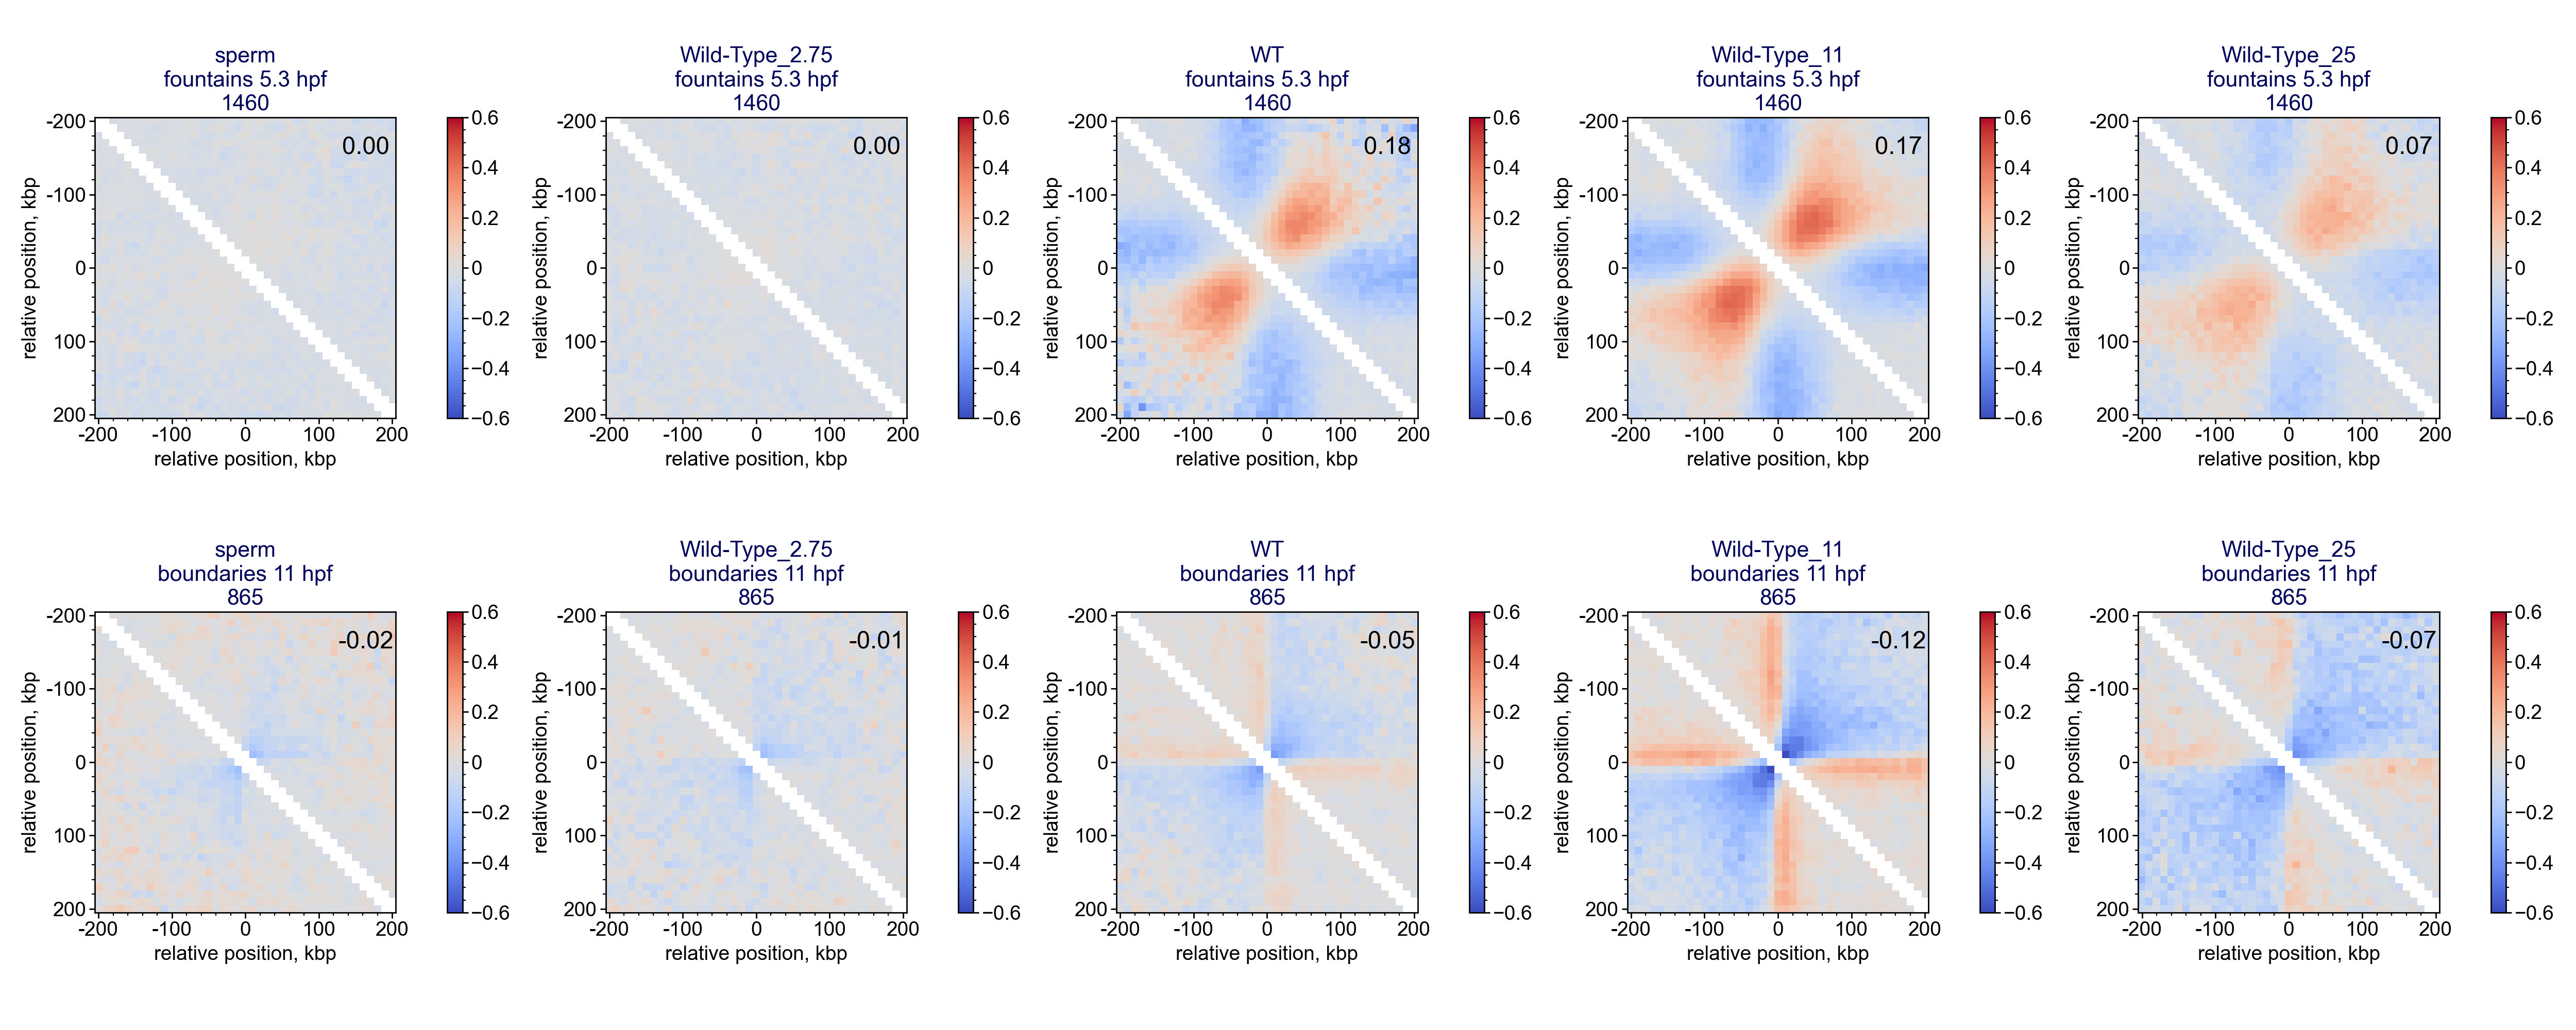

In [43]:
# Save the Hi-C pileups
df_boundaries = bins.loc[bins_boundaries_robust, :]

titles = ["fountains 5.3 hpf", "boundaries 11 hpf"]
idxs = [df_fount_differential.index, df_boundaries.index]

f, axes_all = plt.subplots(2, 5, figsize=[25, 10])

for i_source, source_fountains in enumerate(
    ["sperm", "Wild-Type_2.75", "WT", "Wild-Type_11", "Wild-Type_25"]
):

    axes = np.array([axes_all[i_type, i_source] for i_type, i in enumerate(titles)])

    stacks_list = dct_stacks_hic[source_fountains]

    plot_pileups(
        stacks_list,
        idxs,
        titles,
        flank=200_000,
        resolution=10_000,
        vmin=-0.6,
        vmax=0.6,
        reduce_ticks=False,
        cmap="coolwarm",
        avscore=df_fountain_strength[source_fountains],
        add_counts=True,
        f=f,
        axes=axes,
    )

    for i, ax in enumerate(axes):
        title = ax.get_title()
        title = f"{source_fountains}\n{title}"
        ax.set_title(title)

    if do_save:
        prefix = f"{output_folder}/Fig1D"
        f.savefig(f"{prefix}.pdf")
        f.savefig(f"{prefix}.png")

In [44]:
# Save the Hi-C pileups
df_boundaries = bins.loc[bins_boundaries_robust, :]

titles = ["fountains 5.3 hpf", "boundaries 11 hpf"]
idxs = [df_fount_differential.index, df_boundaries.index]

datasets_pileupds = {}

for source_fountains in [
    "sperm",
    "Wild-Type_2.75",
    "WT",
    "Wild-Type_11",
    "Wild-Type_25",
]:

    stacks_list = dct_stacks_hic[source_fountains]

    data_pileups = plot_pileups(
        stacks_list,
        idxs,
        titles,
        avscore=df_fountain_strength[source_fountains],
        return_source_data=True,
    )

    datasets_pileupds[source_fountains] = data_pileups

In [45]:
if do_save:
    output = []
    for source_fountains in [
        "sperm",
        "Wild-Type_2.75",
        "WT",
        "Wild-Type_11",
        "Wild-Type_25",
    ]:
        data_pileups = datasets_pileupds[source_fountains]

        for data in data_pileups:

            df_tmp = pd.DataFrame(data[2])
            df_tmp.insert(loc=0, column="fountain score", value=data[1])
            df_tmp.insert(loc=0, column="label", value=data[0])
            df_tmp.insert(loc=0, column="source_fountains", value=source_fountains)

            output.append(df_tmp.copy())

    output = pd.concat(output, axis=0)
    prefix = f"{output_folder}/Fig1D-E.pileups"
    output.to_csv(f"{prefix}.source.tsv", sep="\t")

## + Boxplots of fountain score (Fig. 4D)

In [87]:
cols = [
    "WT",
    "Wike2021_WT_ZF_Embryos_4hpf_DMSO",
    "Wike2021_WT_ZF_Embryos_4hpf_SGC",
    "Wike2021_WT_ZF_Embryos_4hpf_FLAV",
    "Wild-Type_2.75",
]

In [88]:
df_merged = pd.merge(
    df_fount_differential,
    df_fountain_strength,
    left_index=True,
    right_index=True,
    how="left",
    suffixes=("", "_"),
)
df_merged = df_merged.drop(
    [x for x in df_merged.columns if x.endswith("_")], axis=1
).reset_index()
df_merged = df_merged.melt(
    id_vars=["index", "chrom", "start", "end"],
    value_vars=cols,
    var_name="data_source",
    value_name="fountain_score",
)

In [89]:
df_merged.head()

,index,chrom,start,end,data_source,fountain_score
0,212,chr1,2120000,2130000,WT,0.186090
1,531,chr1,5310000,5320000,WT,0.120188
2,576,chr1,5760000,5770000,WT,0.090647
3,618,chr1,6180000,6190000,WT,0.184122
4,736,chr1,7360000,7370000,WT,0.145347


##### Tukey-Kramer test

In [101]:
from scipy.stats import tukey_hsd

In [124]:
gb = df_merged.groupby("data_source")
res = tukey_hsd(
    gb.get_group("WT")["fountain_score"],
    gb.get_group("Wike2021_WT_ZF_Embryos_4hpf_DMSO")["fountain_score"],
    gb.get_group("Wike2021_WT_ZF_Embryos_4hpf_FLAV")["fountain_score"],
    gb.get_group("Wike2021_WT_ZF_Embryos_4hpf_SGC")["fountain_score"],
    gb.get_group("Wild-Type_2.75")["fountain_score"],
    equal_var=True,  # Docs: `If True and unequal sample size, perform Tukey-Kramer test`
)

In [125]:
res.statistic

array([[ 0.        ,  0.10788495,  0.13407964,  0.12782948,  0.17353361],
       [-0.10788495,  0.        ,  0.02619469,  0.01994453,  0.06564865],
       [-0.13407964, -0.02619469,  0.        , -0.00625016,  0.03945397],
       [-0.12782948, -0.01994453,  0.00625016,  0.        ,  0.04570412],
       [-0.17353361, -0.06564865, -0.03945397, -0.04570412,  0.        ]])

In [126]:
res.pvalue

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.04952191, 0.        ],
       [0.        , 0.        , 0.04952191, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

In [119]:
print(res)

Pairwise Group Comparisons (99.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.108     0.000     0.100     0.115
 (0 - 2)      0.128     0.000     0.120     0.135
 (0 - 3)      0.134     0.000     0.127     0.142
 (0 - 4)      0.174     0.000     0.166     0.181
 (1 - 0)     -0.108     0.000    -0.115    -0.100
 (1 - 2)      0.020     0.000     0.012     0.027
 (1 - 3)      0.026     0.000     0.019     0.034
 (1 - 4)      0.066     0.000     0.058     0.073
 (2 - 0)     -0.128     0.000    -0.135    -0.120
 (2 - 1)     -0.020     0.000    -0.027    -0.012
 (2 - 3)      0.006     0.050    -0.001     0.014
 (2 - 4)      0.046     0.000     0.038     0.053
 (3 - 0)     -0.134     0.000    -0.142    -0.127
 (3 - 1)     -0.026     0.000    -0.034    -0.019
 (3 - 2)     -0.006     0.050    -0.014     0.001
 (3 - 4)      0.039     0.000     0.032     0.047
 (4 - 0)     -0.174     0.000    -0.181    -0.166
 (4 - 1)     -0.066     0.000    -0.073    -

##### Plotting

In [86]:
colors = ["#FDBF63", "#FEDFB1", "#2A9D8F", "#E6399B", "#B0B1B1"]

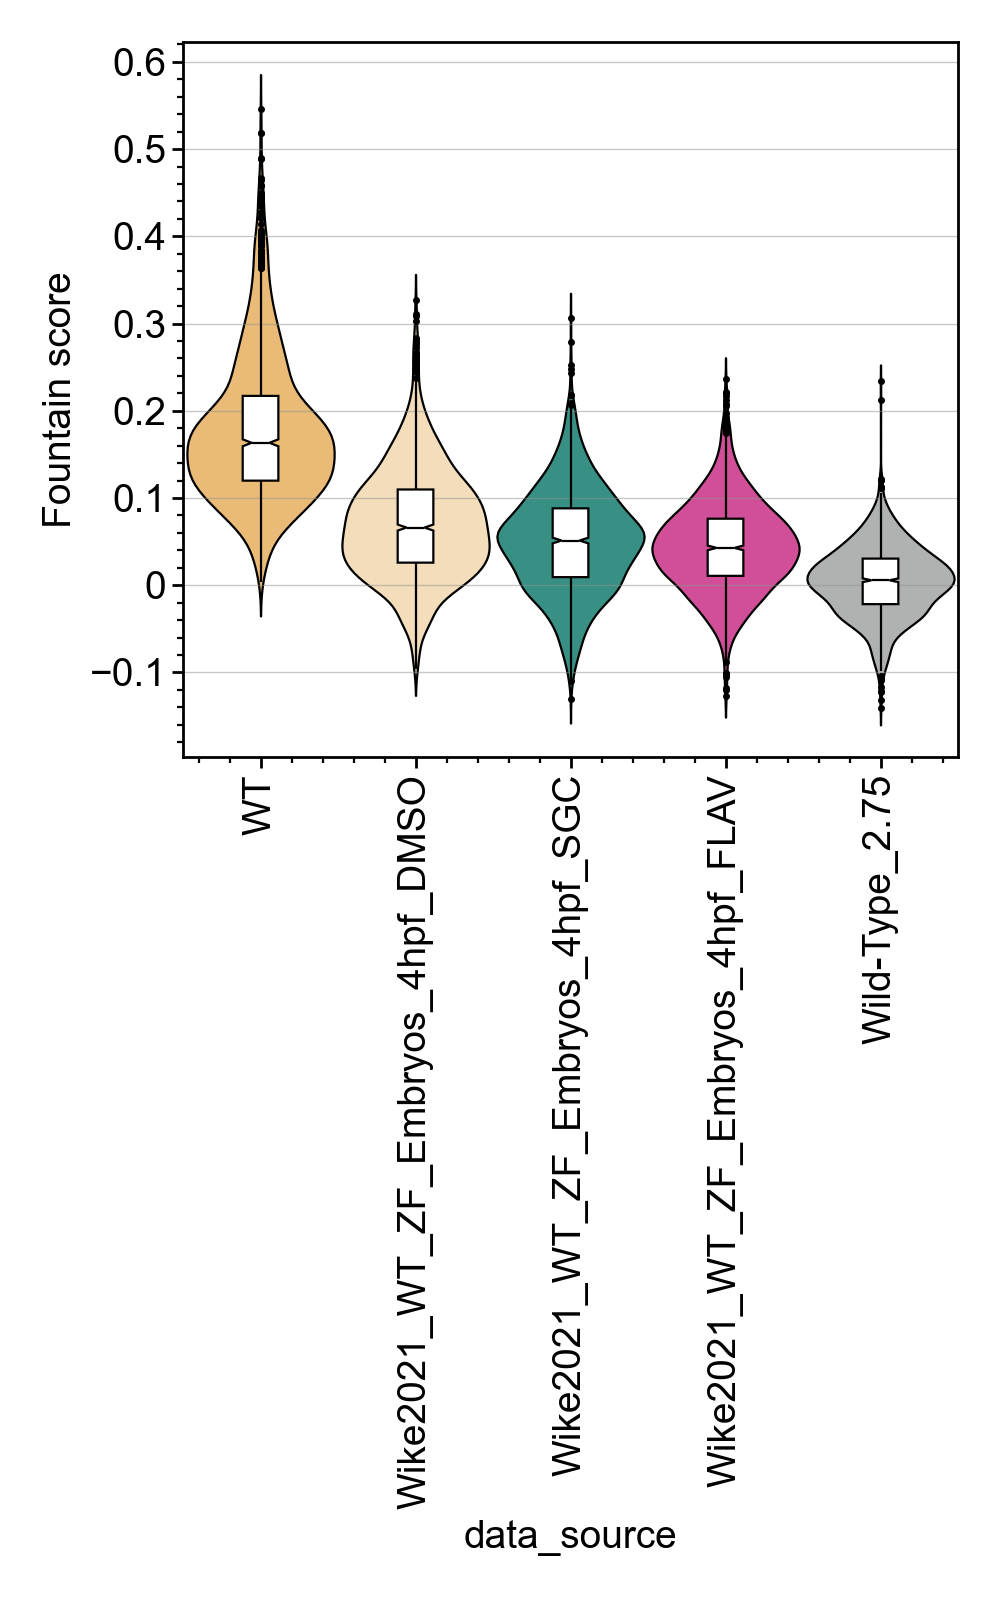

In [50]:
f, ax = plt.subplots(1, 1, figsize=[5, 8])

y_col = "fountain_score"

sns.violinplot(
    data=df_merged,
    x="data_source",
    y=y_col,
    order=cols,
    palette=colors,
    width=0.95,
    linecolor="k",
    inner=None,
    linewidth=0.8,
    alpha=1,
    ax=ax,
)

sns.boxplot(
    data=df_merged,
    x="data_source",
    y=y_col,
    order=cols,
    notch=True,
    width=0.23,
    color="white",
    linewidth=0.8,
    linecolor="k",
    fliersize=3,
    showcaps=False,
    flierprops=dict(marker=".", markerfacecolor="k"),
    ax=ax,
)

ax.grid(True, axis="y", color="gray", linewidth=0.5, alpha=0.5)

ax.set_xticklabels(cols, rotation=90)

ax.set_ylabel("Fountain score")
f.tight_layout()

if do_save:
    prefix = f"{output_folder}/Fig4D.violin-plot"
    f.savefig(f"{prefix}.png")
    f.savefig(f"{prefix}.pdf")

In [120]:
gb = df_merged.groupby(["data_source"])
val = "fountain_score"

output_table = {}
for col in cols:
    output_table[col] = pd.Series(gb.get_group(col)[val].values).describe()

In [121]:
output_table = pd.DataFrame(output_table).T.reset_index()
output_table.columns = [
    "col",
    "count",
    "mean",
    "std",
    "min",
    "25%",
    "50%",
    "75%",
    "max",
]
output_table = output_table.sort_values(["col"]).set_index(["col"])

In [53]:
if do_save:
    prefix = f"{output_folder}/Fig4D.violin-plot"
    output_table.to_csv(f"{prefix}.source.tsv", sep="\t")

In [54]:
section_flush()

✅ Section cleaned
